In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
%matplotlib inline
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/covid19-in-india/StatewiseTestingDetails.csv
/kaggle/input/covid19-in-india/ICMRTestingDetails.csv
/kaggle/input/covid19-in-india/covid_19_india.csv
/kaggle/input/covid19-in-india/HospitalBedsIndia.csv
/kaggle/input/covid19-in-india/IndividualDetails.csv
/kaggle/input/covid19-in-india/AgeGroupDetails.csv
/kaggle/input/covid19-in-india/ICMRTestingLabs.csv
/kaggle/input/covid19-in-india/population_india_census2011.csv


In [2]:
population_data=pd.read_csv("../input/covid19-in-india/population_india_census2011.csv")
hospital_data=pd.read_csv("../input/covid19-in-india/HospitalBedsIndia.csv")

In [3]:
population_data.drop(['Area','Density'],axis=1,inplace=True)

hospital_data.head()
population_data.head()

,Sno,State / Union Territory,Population,Rural population,Urban population,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,912
1,2,Maharashtra,112374333,61556074,50818259,929
2,3,Bihar,104099452,92341436,11758016,918
3,4,West Bengal,91276115,62183113,29093002,953
4,5,Madhya Pradesh,72626809,52557404,20069405,931


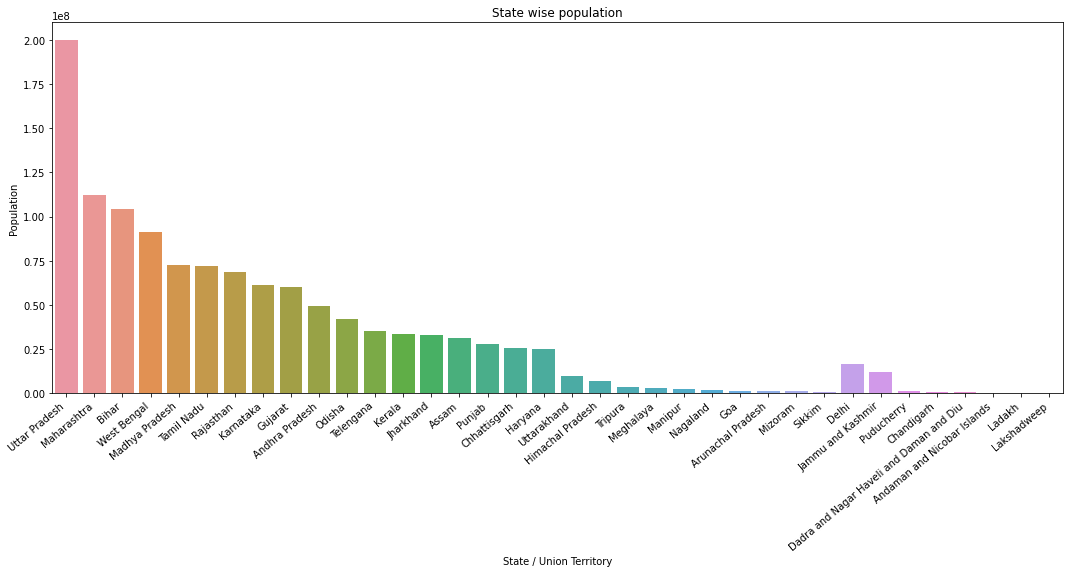

In [4]:
#plt.bar("State / Union Territory","Population",data=population_data,color="orange")
plt.figure(figsize=(15,8))
ax=sns.barplot(x="State / Union Territory",y="Population",data=population_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title("State wise population")
plt.show()

<Figure size 432x288 with 0 Axes>

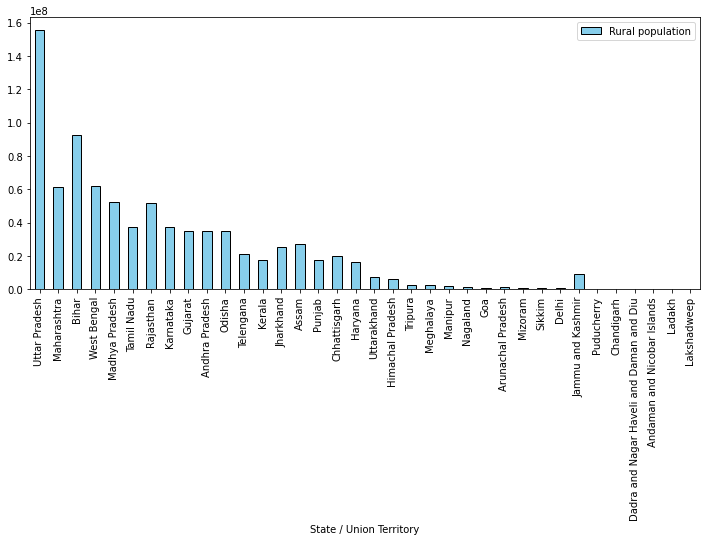

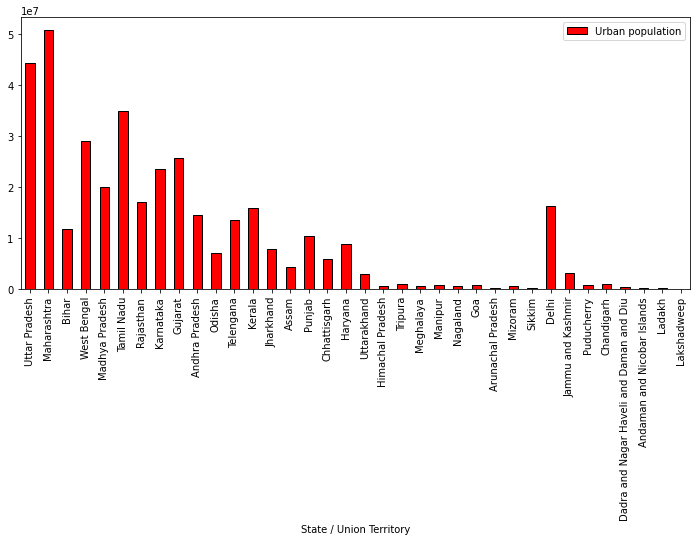

In [5]:
plt.figure()
population_data[["State / Union Territory","Rural population"]].plot.bar(x="State / Union Territory",y="Rural population",color="skyblue",edgecolor="black",figsize=(12,5))
population_data[["State / Union Territory","Urban population"]].plot.bar(x="State / Union Territory",y="Urban population",color="red",edgecolor="black",figsize=(12,5))
plt.show()

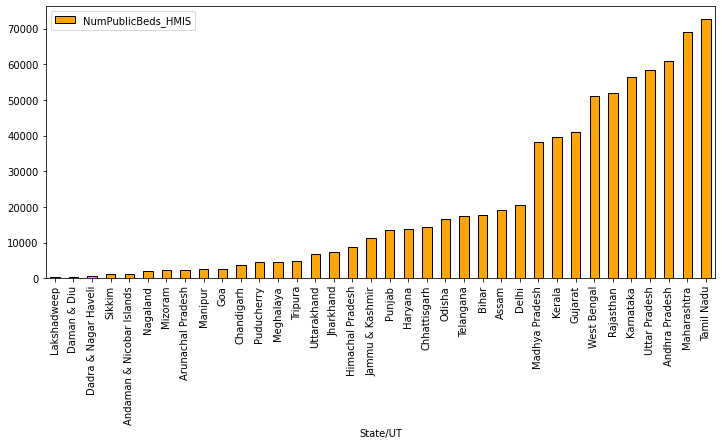

In [6]:
hospital_data.NumSubDistrictHospitals_HMIS.fillna(hospital_data.NumSubDistrictHospitals_HMIS.mean(),inplace=True)
hospital_data=hospital_data[0:36].sort_values(by=["NumPublicBeds_HMIS"])
hospital_data[["State/UT","NumPublicBeds_HMIS"]].plot.bar(x="State/UT",y="NumPublicBeds_HMIS",color="orange",edgecolor="black",figsize=(12,5))
plt.title("Total public hospital beds state wise")